# Create an interactive plot of the Global Yearly Mean Anomaly of a CMIP6 variable

We will show how to combine, analyse and quickly plot data of the Coupled Model Intercomparison Project [CMIP6](https://pcmdi.llnl.gov/CMIP6/). We will choose one variable of multiple experiments and compare the results of different models. In particular, we analyse the historical experiment in combination with one of the shared socioeconomic pathway (ssp) experiments. 

This Jupyter notebook is meant to run in the [Jupyterhub](https://jupyterhub.dkrz.de/hub/login?next=%2Fhub%2Fhome) server of the German Climate Computing Center [DKRZ](https://www.dkrz.de/). The DKRZ hosts the CMIP data pool including 4 petabytes of CMIP6 data. Please, choose the Python 3 unstable kernel on the Kernel tab above, it contains all the common geoscience packages. See more information on how to run Jupyter notebooks at DKRZ [here](https://www.dkrz.de/up/systems/mistral/programming/jupyter-notebook).

Running this Jupyter notebook in your premise, which is also known as [client-side](https://en.wikipedia.org/wiki/Client-side) computing, will require that you install the necessary packages and download data.

Thanks to the data and computer scientists Marco Kulüke, Fabian Wachsmann, Maria Moreno, and Stephan Kindermann at DKRZ for their contribution to this notebook.

### Learning Objectives

- How to access a dataset from the DKRZ CMIP data pool with `intake-esm`
- How to calculate global field means and yearly means with `xarray` and `numpy`
- How to visualize the results with `hvplot`

### Software to be used

- [Intake](https://github.com/intake/intake) for finding the data in the catalog of the DKRZ pool
- [Xarray](http://xarray.pydata.org/en/stable/) for loading and processing the data
- [hvPlot](https://hvplot.holoviz.org/index.html) for visualizing the data in the Jupyter notebook and save the plots in your local computer

In [1]:
import intake
import pandas as pd
import hvplot.pandas
import numpy as np
import xarray as xr

First, we need to set the `variable_id` which we like to plot. This is a selection of the most often analysed variables:

- `tas` is *Near-surface Air Temperature*
- `pr` is *Precipitation*
- `psl` is *Sea level pressure*
- `tasmax` is *Near-surface Maximum Air Temperature*
- `tasmin` is *Near-surface Minimum Air Temperature*
- `clt` is *Total Cloud Cover Percentage*

Choose the variable:

In [2]:
# Choose one of
# pr, psl, tas, tasmax, tasmin, clt
variable_id = "tas"

In [3]:
# get formating done automatically according to style `black`
#%load_ext lab_black

The `intake-esm` software reads *Catalogs* which we use to **find, access and load** the data we are interested in. Daily updated CMIP6 catalogs are provided in DKRZ's cloud [swift](https://swiftbrowser.dkrz.de/public/dkrz_a44962e3ba914c309a7421573a6949a6/intake-esm/).

Similar to the shopping catalog at your favorite online bookstore, the intake catalog contains information (e.g. model, variables, and time range) about each dataset (the title, author, and number of pages of the book, for instance) that you can access before loading the data. It means that thanks to the catalog, you can find out where the book is just by using some keywords and you do not need to hold it in your hand to know the number of pages.

We specify the catalog descriptor for the intake package. The catalog descriptor is created by the DKRZ developers that manage the catalog, you do not need to care so much about it, knowing where it is and loading it is enough:

In [4]:
#col_url = "https://swift.dkrz.de/v1/dkrz_a44962e3ba914c309a7421573a6949a6/intake-esm/mistral-cmip6.json"
col_url = "https://swift.dkrz.de/v1/dkrz_a44962e3ba914c309a7421573a6949a6/intake-esm/dkrz-cmip-data-pool-opendap.json"
col = intake.open_esm_datastore(col_url)

In [5]:
col.df

activity_id institution_id   source_id experiment_id member_id  \
0         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
1         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
2         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
3         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
4         AerChemMIP            BCC    BCC-ESM1    hist-piAer  r1i1p1f1   
...              ...            ...         ...           ...       ...   
5470003  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5470004  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5470005  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5470006  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   
5470007  ScenarioMIP             UA  MCM-UA-1-0        ssp585  r1i1p1f2   

        table_id variable_id grid_label  dcpp_init_year    version  \
0         AERmon        c2h6         gn             NaN  v20200511   
1         AERmon        c3h6         gn             NaN  v20200511   
2         AERmon        c3h8         gn             NaN  v20200511   
3         AERmon        cdnc         gn             NaN  v20200522   
4         AERmon    ch3coch3         gn             NaN  v20200511   
...          ...         ...        ...             ...        ...   
5470003     Omon      thetao         gn             NaN  v20190731   
5470004     Omon         tos         gn             NaN  v20190731   
5470005    SImon     sithick         gn             NaN  v20190731   
5470006       fx   areacella         gn             NaN  v20190731   
5470007       fx        orog         gn             NaN  v20190731   

            time_range                                               path  \
0        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
1        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
2        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
3        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
4        185001-201412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...   
...                ...                                                ...   
5470003  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5470004  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5470005  201501-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5470006            NaN  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
5470007            NaN  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   

                                               opendap_url  
0        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...  
1        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...  
2        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...  
3        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...  
4        http://esgf3.dkrz.de/thredds/dodsC/cmip6/AerCh...  
...                                                    ...  
5470003  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
5470004  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
5470005  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
5470006  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
5470007  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  

[5470008 rows x 13 columns]

### Browsing through the catalog

We define a query and specify values for some columns of the catalogs.
In this example, we compare the MPI-ESM1-2-HR model of the Max-Planck-Institute and the AWI-CM-1-1-MR from the Alfred Wegner Institute for 3 different experiments. CMIP6 comprises many experiments with lots of simulation members and we will use some of them. You can find more information in the [CMIP6 Model and Experiment Documentation](https://pcmdi.llnl.gov/CMIP6/Guide/dataUsers.html#5-model-and-experiment-documentation).

We will concatenate historical experiment with two different Shared Socioeconomic Pathway (SSPs) scenarios. The historical experiment uses best estimates for anthropogenic and natural forcing for simulating the historical period 1850-2014. SSPs are scenarios of projected socioeconomic global changes.  
- *historical*

    This experiments usese the best estimates for anthropogenic and natural forcing for simulating the historical period 1850-2014. 
- *ssp245*

    The 45 corresponds to the growth in radiative forcing reached by 2100, in this case, 4.5 W/m2 or ~650 ppm CO2 equivalent
- *ssp585*

    The 85 corresponds to the growth in radiative forcing reached by 2100, in this case, 8.5 W/m2

In [6]:
query = dict(
    variable_id=variable_id,
    table_id="Amon",
    experiment_id=["historical", "ssp245"],#, "ssp585"],
    source_id=["MPI-ESM1-2-HR", "AWI-CM-1-1-MR"],
)
cat = col.search(**query)

The catalog consists of the following files

In [7]:
cat.df

activity_id institution_id      source_id experiment_id member_id  \
0            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
1            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
2            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
3            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
4            CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
...           ...            ...            ...           ...       ...   
1272  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1273  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1274  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1275  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   
1276  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp245  r2i1p1f1   

     table_id variable_id grid_label  dcpp_init_year    version  \
0        Amon         tas         gn             NaN  v20200720   
1        Amon         tas         gn             NaN  v20200720   
2        Amon         tas         gn             NaN  v20200720   
3        Amon         tas         gn             NaN  v20200720   
4        Amon         tas         gn             NaN  v20200720   
...       ...         ...        ...             ...        ...   
1272     Amon         tas         gn             NaN  v20190710   
1273     Amon         tas         gn             NaN  v20190710   
1274     Amon         tas         gn             NaN  v20190710   
1275     Amon         tas         gn             NaN  v20190710   
1276     Amon         tas         gn             NaN  v20190710   

         time_range                                               path  \
0     185001-185012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
1     185101-185112  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
2     185201-185212  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
3     185301-185312  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
4     185401-185412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...   
...             ...                                                ...   
1272  208001-208412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1273  208501-208912  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1274  209001-209412  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1275  209501-209912  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   
1276  210001-210012  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...   

                                            opendap_url  
0     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...  
1     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...  
2     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...  
3     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...  
4     http://esgf3.dkrz.de/thredds/dodsC/cmip6/CMIP/...  
...                                                 ...  
1272  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
1273  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
1274  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
1275  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  
1276  http://esgf3.dkrz.de/thredds/dodsC/cmip6/Scena...  

[1277 rows x 13 columns]

Show PID handels for data

In [8]:
pid_list = []

In [9]:
for fpath in cat.df['opendap_url']:
    arr= xr.open_dataset(fpath)
    pid_list.append(arr.attrs['tracking_id'])
    print(arr.attrs['tracking_id'])

hdl:21.14100/da3fa9d6-2dc3-4193-b973-c748e4a856fb
hdl:21.14100/59619fd7-e7a1-4d83-8ec5-8aa6ff45e8c4
hdl:21.14100/2c8e0373-d6be-4a1c-b557-c54b8b29b16c
hdl:21.14100/73282da0-e284-4bfe-8358-7884e528febc
hdl:21.14100/8837cb85-23ff-447c-a683-6584b8589169
hdl:21.14100/26ed31aa-8b37-4bcd-8a7c-40268b3a376f
hdl:21.14100/baf3a654-2534-4969-ba9f-5edce2102fdd
hdl:21.14100/6b58dd72-8d3d-41aa-b9cb-1a081e70b552
hdl:21.14100/2592ed15-c8b6-475f-b395-43158d2d38e9
hdl:21.14100/d7978d88-4361-4584-b225-03bf89ed1c89
hdl:21.14100/f35f5c43-7a69-45c6-acfe-ea09d9e49d91
hdl:21.14100/db2b564d-609a-4d6c-8e88-b0d6838ea694
hdl:21.14100/4b3f0d58-d7c0-4544-a29b-5f62e078e4cc
hdl:21.14100/3f27d5fe-cea6-4377-866a-e7827e3eb637
hdl:21.14100/e1c46f5e-a275-483c-b8ad-1ac21de28912
hdl:21.14100/8b3c4c0e-9196-48cc-a8b8-ad5a38e835bf
hdl:21.14100/af1a56d9-95a2-4801-87f7-5a3dc7d5c3fc
hdl:21.14100/9868221e-9d36-4aa3-8fec-bd1bad9804b8
hdl:21.14100/0b061d45-0163-41c2-8003-65131c1d43fd
hdl:21.14100/3a151428-b357-4036-b3fd-15c71098cf8a


hdl:21.14100/5a5c291f-0f77-4e80-a29c-3860b28e6d16
hdl:21.14100/f550bade-46c7-4976-962a-c10808c81904
hdl:21.14100/5f72c74f-7e59-439e-8852-842757ddd90a
hdl:21.14100/be9bd54a-8dd8-4296-aaac-14bc67db087b
hdl:21.14100/ca878fb9-5c8e-4183-bbb7-f04b93375a5a
hdl:21.14100/47245ebf-d21a-4664-9a29-58ecba04cbe7
hdl:21.14100/a0770f7e-1e42-4bff-b126-81d714483c94
hdl:21.14100/1b79d71d-43ea-4727-ad00-a8e469c447a0
hdl:21.14100/d1943963-3a92-4c58-a72a-e67e68e188ab
hdl:21.14100/7a2bac30-90a3-4dac-9729-7124cb169ce3
hdl:21.14100/b0c20fb1-4262-4efd-b4cd-2dae5f5e1048
hdl:21.14100/df9c035d-68e4-48ea-b040-7fac249aa394
hdl:21.14100/f9e448d0-6bd6-44e2-bf01-9bf874229f13
hdl:21.14100/2318abfb-ef93-47a5-a5b1-8d4413c561f8
hdl:21.14100/930b2b56-7e75-4da8-8dce-cda5cd41caed
hdl:21.14100/e3437dc4-3647-417b-978e-8708c1252521
hdl:21.14100/c1bf6044-8c00-4fbb-abf8-e8d2fa9f77e8
hdl:21.14100/8ac32e39-64c1-4b3d-bf9b-f3a305f9a9fe
hdl:21.14100/f304f5fc-bd0f-4ada-b991-42cf8b367bbb
hdl:21.14100/5bcd36fa-bd0e-4a0d-ad3c-9c5a01817a9d


hdl:21.14100/d0c937dd-c521-4c34-b8d4-1a0ad4ec8066
hdl:21.14100/4d45f40e-8fdc-4d77-b973-9b29f8ba32aa
hdl:21.14100/76189331-a354-4056-b872-2c5c4dae92d6
hdl:21.14100/ca073704-b12b-455a-8057-cb0e5a51c740
hdl:21.14100/91c6e811-bae8-4c36-b9b8-1ad5d3517986
hdl:21.14100/a40d1e5b-51ad-4f94-896e-b1664037a87c
hdl:21.14100/6314d735-13b7-4b66-ac6c-9c9a3053eaf4
hdl:21.14100/2c3086ea-b583-40c5-a8f4-f6a99b87f84e
hdl:21.14100/dd8f28de-a800-4e15-98d5-1a755bf6bd71
hdl:21.14100/5c87ebf9-8ed5-4b95-b7c6-0711c49a178d
hdl:21.14100/9234cec6-b6f1-4221-9e51-9a4beca6f86e
hdl:21.14100/613fb084-eba3-43c4-9ef7-7c33dfb61002
hdl:21.14100/4964d9f1-67ef-4cf3-91a0-743fa94fc7b6
hdl:21.14100/4a19d4a5-3da2-42ae-b3c6-2c1cfbabb1e2
hdl:21.14100/94ae313f-8710-4a3d-b861-7758014b1747
hdl:21.14100/d6030065-031f-4900-946e-cbbf841ee604
hdl:21.14100/3c1d0a02-4a11-44f3-b8a6-4134b3491eba
hdl:21.14100/27ec37f2-9921-4362-89c4-62c4beb3ad33
hdl:21.14100/ea63db3a-48c4-4ddb-ac71-fc2267a1ece9
hdl:21.14100/35e9a0bb-f614-42f3-9795-f0c50776b8b0


hdl:21.14100/157f7d52-b080-4af4-81b0-0394cab6a5a9
hdl:21.14100/c3a15ce2-33ef-4feb-bbf0-2506dd975484
hdl:21.14100/a8c27e1f-18fa-4d22-9c59-8132f18ccc39
hdl:21.14100/254d8356-59a3-4dd7-a7be-5fe6fdbfc4d0
hdl:21.14100/c4fed2f2-0bbb-466a-aa4e-a670f8d57fae
hdl:21.14100/d5b55c9e-6437-4117-b72c-ef6892464088
hdl:21.14100/22546c8e-cc6b-4bfb-b0d3-7823ac0bbeb5
hdl:21.14100/903b532f-eaad-4b71-8205-57949abcdb67
hdl:21.14100/9e017ede-f019-424b-b79e-b3dfd276c834
hdl:21.14100/f914ccb7-9d6d-4099-8cf9-02b2ab0bc974
hdl:21.14100/4cdf322e-09b7-40fa-9a2a-f1d6bbe5a0ab
hdl:21.14100/046538d7-e973-4545-9b43-6ada043f3c93
hdl:21.14100/639ae79d-dc28-4981-ba96-13e108e85aa8
hdl:21.14100/76318148-62ea-4c0f-817c-87d2ea02ddb4
hdl:21.14100/552e4e40-c403-4915-a807-63df8fc45a21
hdl:21.14100/869c0459-7e2e-4749-bd47-3880257d6435
hdl:21.14100/d7db86e5-96db-46f6-917e-ebab7b82f3c0
hdl:21.14100/4e29b71a-00b3-47bf-a916-252a45e16138
hdl:21.14100/38e522ee-39f6-4e96-88ff-f054d3e76ddf
hdl:21.14100/5c983e54-4ead-4cf2-9a11-152122bd6c19


hdl:21.14100/0c857ebd-bb57-4d6b-a417-68493d484b3f
hdl:21.14100/0bf690e0-03a0-4558-a00b-fe5755d1ce8c
hdl:21.14100/9b0140fe-f7d4-4e55-a442-bb57e04bbcfa
hdl:21.14100/77e07877-a0f2-4806-84f5-b1c2344d49de
hdl:21.14100/59bb0d55-9798-4f51-b89b-31bcc3947277
hdl:21.14100/4e7c079d-ba2c-4645-a541-f545bd026dd3
hdl:21.14100/4fa1e7d4-0060-42cb-bcc4-ff6be286800c
hdl:21.14100/b570f279-2d73-4f1a-bbe5-95fcd5ab3dd5
hdl:21.14100/49f5b4fe-8879-48b8-9d2a-51ffc93f22ec
hdl:21.14100/8f27c7af-53cc-4ef0-9a5d-f182b1ac38f5
hdl:21.14100/ae68fbe4-9246-4d91-b2d1-bb879fd15049
hdl:21.14100/d4333fc1-e252-45b3-899e-ddf3df7cafe8
hdl:21.14100/9e7db983-fe2a-465b-9532-fd1980ae1aed
hdl:21.14100/a6f87a8c-af16-4b0e-9ae9-ec4ef4e04831
hdl:21.14100/2c274dda-f938-4101-805a-4c57a05b257b
hdl:21.14100/83853452-f516-40f6-9df0-73403bf5157a
hdl:21.14100/48a5b646-77d9-43b1-9c76-394511ee91b3
hdl:21.14100/da529deb-57d4-4b76-bf97-c3dcd8b0f886
hdl:21.14100/0feaa626-271e-4113-ab90-1518027cfbb7
hdl:21.14100/f65f814e-de81-44fd-a7e4-451bcbd66534


hdl:21.14100/14f39b96-e2ab-48c5-9b1a-e26cfdd1a048
hdl:21.14100/fb964a1a-52b5-4225-b1fd-204167614393
hdl:21.14100/20c4810a-de27-4234-a921-32b46553462d
hdl:21.14100/c716c99d-205c-4e78-987c-5b9e2effa48d
hdl:21.14100/9048c134-671c-44f4-915a-48091558ce07
hdl:21.14100/451b668a-12c1-4417-bdee-155162aff7c4
hdl:21.14100/184a01a0-bee7-44d5-abb8-d461ed8e6268
hdl:21.14100/2e7ef93b-017a-4c39-88d1-4f5d070f4ca3
hdl:21.14100/3cfbf7cc-bd48-42cb-ac72-0ccd96d01e6e
hdl:21.14100/c1a5b0d6-72f6-4cad-872d-628a21a176a6
hdl:21.14100/e2ece7e5-0b46-4689-83f6-38657cd1b2a8
hdl:21.14100/09b5ef7a-598b-45fb-adf4-a6052c8061c3
hdl:21.14100/338a95e0-c8ea-40cf-8808-610a4b823d80
hdl:21.14100/404d9306-1d69-407c-8f22-0f9ffb862c3a
hdl:21.14100/eaba22d6-41bd-446e-a7ff-fbb9c2240bf5
hdl:21.14100/4a90c3bf-a7a1-437d-ace8-deff5895153b
hdl:21.14100/f74ac82a-7afa-41e3-b6ca-84f1a31e53eb
hdl:21.14100/2ca0aea5-f647-4c25-8af2-283d5a455df2
hdl:21.14100/48f09190-cea9-40f3-b254-6efbfe9f61f0
hdl:21.14100/283da01f-ac7c-443f-b1de-b4e6a760ecf6


hdl:21.14100/ea7a9c85-c940-4937-838b-076ea6620045
hdl:21.14100/73f74b32-ae35-4cf7-9ad1-1ecdd4193d59
hdl:21.14100/8650f5f8-ab15-4b4e-a0df-b58bff8451df
hdl:21.14100/1c2ba452-f69d-4bc2-851d-461fef13ecbb
hdl:21.14100/32828615-fd6a-453c-9b42-704f8178b981
hdl:21.14100/cd6e446a-1137-41fd-85c7-faf0deb0bce8
hdl:21.14100/f21255b9-c38e-4717-ac8d-a832a19681a6
hdl:21.14100/8c752d4a-27db-482a-8d7e-89f26d9ea57f
hdl:21.14100/5774a32a-dd7e-45a8-8d64-3392a4715ab0
hdl:21.14100/d23c70dd-4b89-4a43-a4cf-cc964c70ef64
hdl:21.14100/054e4d38-8273-4993-9b99-ff2587b728c8
hdl:21.14100/134ce0e8-4353-4550-9059-63530fcc148f
hdl:21.14100/874b905f-8032-4bee-99bc-cf6b9ea85304
hdl:21.14100/760cf5a5-716a-49a6-b5b2-e1927dc0eb37
hdl:21.14100/23f4070c-b661-4b9d-a7ad-01445319516a
hdl:21.14100/237e91d2-71ac-4290-856e-885fed878f45
hdl:21.14100/b975ba2e-cfa3-4659-b6a3-39493ec6d6fb
hdl:21.14100/7ef1c66c-fbdf-4709-a20e-14adc441746f
hdl:21.14100/3ebdd954-2a4a-4839-80ad-b6169fbdd6ac
hdl:21.14100/1f2107fd-b430-4a6f-9034-65b8d0060389


hdl:21.14100/4639c62d-4f4c-4778-8218-03419097f167
hdl:21.14100/6c6ebada-50cc-4167-bf75-d4ee8a9cbd33
hdl:21.14100/5c7180e1-a82c-4f62-982a-153911d015aa
hdl:21.14100/66c23f9f-d0e7-42bf-b82d-49611b95aa87
hdl:21.14100/50f7f23d-4f96-4175-bae5-29cddc984953
hdl:21.14100/82c0ce5d-c77b-4527-8b19-a333f6e9241a
hdl:21.14100/8952d514-fa9d-4323-be43-1e58e3d5c5d1
hdl:21.14100/2b34795d-7833-4bd6-b48d-731e91bff3d7
hdl:21.14100/b00ad220-fadb-4707-b2af-ab9ae8500442
hdl:21.14100/118b040b-df76-435d-ac34-f0210a06e891
hdl:21.14100/77b7fedd-ec39-466b-92a3-421e6f68a75f
hdl:21.14100/d589b791-80ed-435f-bba5-2d6d632912df
hdl:21.14100/4bec59ef-22bd-44ef-917d-709bdef8cb29
hdl:21.14100/90e1d075-9746-49c2-bb66-1148bf88ad9c
hdl:21.14100/b3597838-c8e3-40cf-82fb-8dc9c9c33f0b
hdl:21.14100/e8dbd1f6-3121-44fb-a807-50fd40590e50
hdl:21.14100/1f13fb26-30fd-48d2-b464-c03635565059
hdl:21.14100/06fe4210-65d0-4cd3-9744-90ebeaec3f14
hdl:21.14100/065261fd-e85f-4653-be54-a385251b0324
hdl:21.14100/34a4cd94-7776-4b2c-a98a-6d2fdabf1d2c


## Add PID handles to Catalogue

In [10]:
cat_new = cat.df
cat_new['PID'] = pd.Series(pid_list, index=cat_new.index)

# Provenance Visualization

In [11]:
 from prov.model import ProvDocument

In [12]:
# Create a new provenance document
doc = ProvDocument()

## Namespaces

In [13]:
doc.add_namespace('software', 'test')
doc.add_namespace('project', 'test')
doc.add_namespace('workflow', 'test')  # workflow description
doc.add_namespace('operator', 'test')  # task, job, calculation, algorithm
doc.add_namespace('parameter', 'test') # operator parameter, option
doc.add_namespace('file', 'test')  # netcdf, plots
doc.add_namespace('attribute', 'test')  # netcdf attributes, headers variables

<Namespace: software {test}>

## Software

In [14]:
software_test = doc.activity('software:test')

## Project

In [15]:
project_eosc = doc.agent('project:EOSC')

## Datasets

In [16]:
attributes = {'attribute:variable': 'tas'}
ds_0 = doc.entity('file:'+cat.df['path'][0], attributes)
ds_1 = doc.entity('file:'+cat.df['path'][1], attributes)

## Operators

In [17]:
op_none = doc.activity('operator:none')
op_pid = doc.activity('operator:none')

## Workflow

In [18]:
# Create workflow
wf_none = doc.entity('workflow:none.json')

# Relate workflow to project
doc.wasAttributedTo(wf_none, project_eosc)

# Create workflow
wf_pid = doc.entity('workflow:pid.json')

# Relate workflow to project
doc.wasAttributedTo(wf_pid, project_eosc)

<ProvAttribution: (software:pid.json, software:EOSC)>

## Run None Operator

In [19]:
doc.start(op_none, starter=software_test, trigger=wf_none)

<ProvStart: (software:none, software:none.json)>

In [20]:
doc.wasDerivedFrom(ds_0, ds_1, activity=op_none)

<ProvDerivation: (software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc, software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-185112.nc)>

## Run PID Operator

In [21]:
doc.start(op_pid, starter=software_test, trigger=wf_pid)

<ProvStart: (software:none, software:pid.json)>

In [22]:
# show PID Handle for file
output_pid = doc.entity('file:'+cat.df['PID'][0], attributes)
doc.wasDerivedFrom(output_pid, ds_0, activity=op_pid)

<ProvDerivation: (software:hdl:21.14100/da3fa9d6-2dc3-4193-b973-c748e4a856fb, software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc)>

## Show Provenance

In [23]:
print(doc.get_provn())

document
  prefix software <test>
  
  activity(software:test, -, -)
  agent(software:EOSC)
  entity(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.nc, [software:variable="tas"])
  entity(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185101-185112.nc, [software:variable="tas"])
  activity(software:none, -, -)
  activity(software:none, -, -)
  entity(software:none.json)
  wasAttributedTo(software:none.json, software:EOSC)
  entity(software:pid.json)
  wasAttributedTo(software:pid.json, software:EOSC)
  wasStartedBy(software:none, software:none.json, software:test, -)
  wasDerivedFrom(software:/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200720/tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_

## Visualization

In [24]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("test_prov.png")

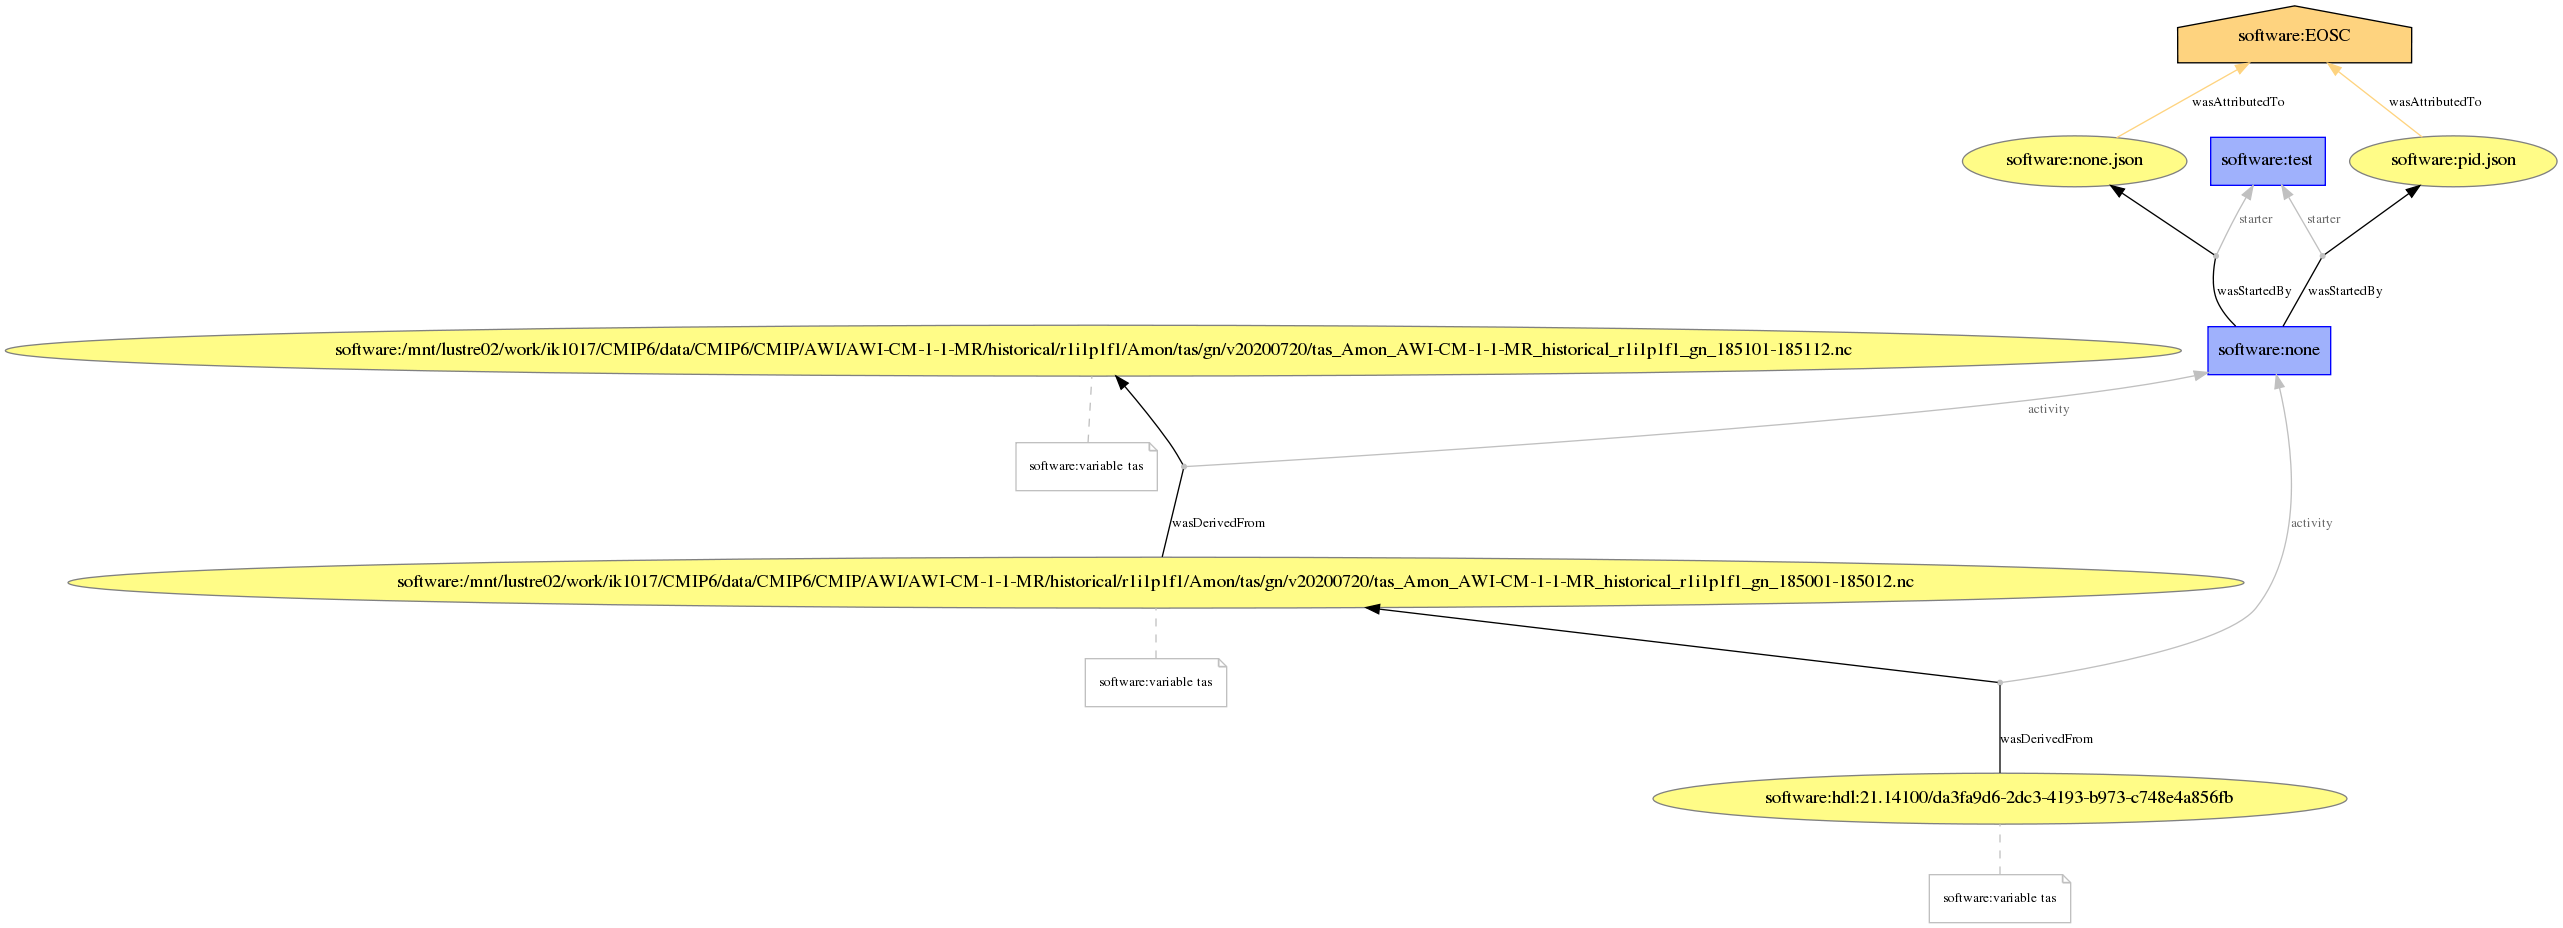

In [25]:
from IPython.display import Image
Image("test_prov.png")